# Recursive Feature Elimination using Feature Engine by `Mr. Harshit Dawar!`

In [1]:
# Importing the required Libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from feature_engine.selection import RecursiveFeatureElimination

In [2]:
# Loading the Dataset

data = pd.read_csv("../ds/Titanic.csv")
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.590495,1,0,-0.500240,S
1,1,1,female,0.643971,1,0,0.788947,C
2,1,3,female,-0.281878,0,0,-0.486650,S
3,1,1,female,0.412509,1,0,0.422861,S
4,0,3,male,0.412509,0,0,-0.484133,S


In [3]:
X = data.drop("Survived", axis = 1)
y = data.Survived

In [4]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,-0.590495,1,0,-0.500240,S
1,1,female,0.643971,1,0,0.788947,C
2,3,female,-0.281878,0,0,-0.486650,S
3,1,female,0.412509,1,0,0.422861,S
4,3,male,0.412509,0,0,-0.484133,S
...,...,...,...,...,...,...,...
884,2,male,-0.204724,0,0,-0.384475,S
885,1,female,-0.821957,0,0,-0.042213,S
886,3,female,0.003524,1,2,-0.174084,S
887,1,male,-0.281878,0,0,-0.042213,C


In [5]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [6]:
# Encoding the Categorical Variables

X.Embarked = LabelEncoder().fit_transform(X.Embarked)
X.Sex = LabelEncoder().fit_transform(X.Sex)

# Dividing the Dataset into Train & Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [7]:
# Generating Feature Selector
Feature_Selector = RecursiveFeatureElimination(estimator = RandomForestClassifier(),
                                     scoring = "accuracy",
                                     variables = None,
                                     threshold = 0.02,
                                     cv = 5,
                                     )

Feature_Selector.fit(x_train, y_train)

RecursiveFeatureElimination(cv=5, scoring='accuracy', threshold=0.02,
                            variables=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                                       'Fare', 'Embarked'])

In [8]:
Feature_Selector.initial_model_performance_

0.7960264900662252

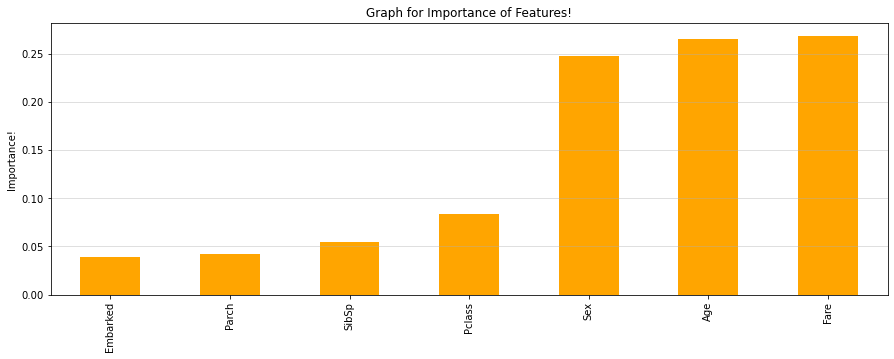

In [9]:
# Checking Feature Importance

Feature_Selector.feature_importances_.plot.bar(figsize = (15, 5), color = "orange")
plt.grid(axis = "y", alpha = 0.5, animated = True)
plt.ylabel("Importance!")
plt.title("Graph for Importance of Features!")
plt.show()

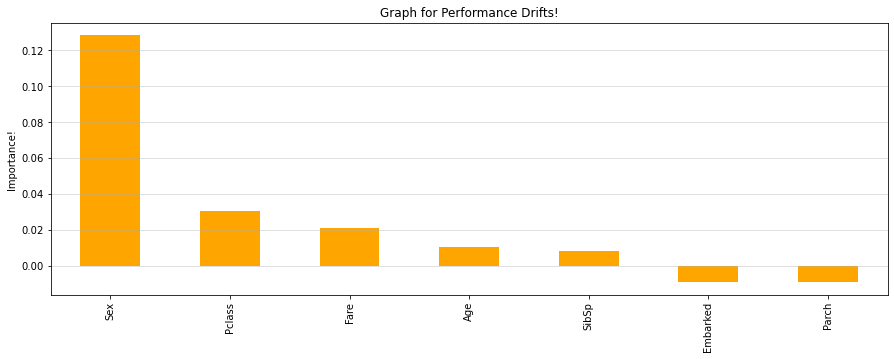

In [17]:
# Checking Performance Drifts

pd.Series(Feature_Selector.performance_drifts_).sort_values(ascending=False).plot.bar(figsize = (15, 5), color = "orange")
plt.grid(axis = "y", alpha = 0.5, animated = True)
plt.ylabel("Importance!")
plt.title("Graph for Performance Drifts!")
plt.show()

***Here, the Performance Drift is measured from the Acutal Metric Value obtained by training the Model using that Particualr Features, that is why the output of this & the above grapg may or may not match***